In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
DATA = DATA = '/Users/jane/Desktop/81_67.csv'
df = pd.read_csv(DATA)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,6308,6308,4.925598,Watched,['Entertainment'],1177.0,62101.0,691.0,3085690.0,2019,8,28,2,13,2,https://www.youtube.com/watch?v=7Z76MiQv0zg,Inside Liv Tyler's Gut-Renovated NYC Brownston...,youtube,NaN,2019-08-28 02:13:00
1,6306,6306,4.959264,Watched,['People & Blogs'],259.0,25173.0,70.0,1133572.0,2019,8,28,9,15,2,https://www.youtube.com/watch?v=tM76nAN6SLo,NaN,youtube,NaN,2019-08-28 09:15:00
2,6307,6307,NaN,Searched,NaN,NaN,NaN,NaN,NaN,2019,8,28,9,15,2,https://www.youtube.com/results?search_query=p...,NaN,youtube,NaN,2019-08-28 09:15:00
3,6305,6305,NaN,Searched,NaN,NaN,NaN,NaN,NaN,2019,8,28,11,46,2,https://www.youtube.com/results?search_query=C...,NaN,youtube,NaN,2019-08-28 11:46:00
4,6304,6304,4.974068,Watched,['Travel & Events'],4.0,613.0,129.0,13571.0,2019,8,28,18,14,2,https://www.youtube.com/watch?v=n2W6tLp237I,Baggage Storage in Amsterdam Schiphol Airport:...,youtube,NaN,2019-08-28 18:14:00


In [7]:
df.dropna(subset=['categories'], inplace=True)

In [8]:
indexNames = df[df['categories'] == '[]'].index
df.drop(indexNames, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,6308,6308,4.925598,Watched,['Entertainment'],1177.0,62101.0,691.0,3085690.0,2019,8,28,2,13,2,https://www.youtube.com/watch?v=7Z76MiQv0zg,Inside Liv Tyler's Gut-Renovated NYC Brownston...,youtube,NaN,2019-08-28 02:13:00
1,6306,6306,4.959264,Watched,['People & Blogs'],259.0,25173.0,70.0,1133572.0,2019,8,28,9,15,2,https://www.youtube.com/watch?v=tM76nAN6SLo,NaN,youtube,NaN,2019-08-28 09:15:00
4,6304,6304,4.974068,Watched,['Travel & Events'],4.0,613.0,129.0,13571.0,2019,8,28,18,14,2,https://www.youtube.com/watch?v=n2W6tLp237I,Baggage Storage in Amsterdam Schiphol Airport:...,youtube,NaN,2019-08-28 18:14:00
5,6303,6303,4.954037,Watched,['Comedy'],3200.0,275283.0,1031.0,5390070.0,2019,8,29,19,42,3,https://www.youtube.com/watch?v=faDDENDHyF8,Trying To Make My Own Wig,youtube,NaN,2019-08-29 19:42:00
7,6301,6301,4.911377,Watched,['People & Blogs'],601.0,26525.0,200.0,2382313.0,2019,8,29,20,33,3,https://www.youtube.com/watch?v=9oansGOr1YE,Sing Sing Sing - Benny Goodman (Mellisan Elect...,youtube,NaN,2019-08-29 20:33:00


In [66]:
df_totals = df.groupby(['months', 'categories']).count().reset_index()
renamed = df_totals.rename(columns={'Unnamed: 0':'total'})
dropped = renamed[['months', 'categories', 'total']]
dropped.head()


,months,categories,total
0,1,['Autos & Vehicles'],1
1,1,['Comedy'],67
2,1,['Education'],24
3,1,['Entertainment'],320
4,1,['Film & Animation'],128


In [70]:
news = dropped[dropped['categories']=="['News & Politics']"]
news.head()
science = dropped[dropped['categories']=="['Science & Technology']"]
science.head()

,months,categories,total
12,1,['Science & Technology'],5
49,2,['Science & Technology'],5
220,3,['Science & Technology'],3
233,4,['Science & Technology'],9
261,9,['Science & Technology'],3


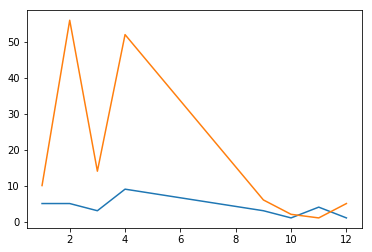

In [73]:
plot1 = plt.plot(science['months'], science['total'])
plot2 = plt.plot(news['months'], news['total'])

In [33]:
df_before = df[(df['months'] <= 12) & (df['years']==2019)]
df_transition = df[(df['months'] <= 2) & (df['years']==2020)]
df_corona = df[(df['months'] > 2) & (df['years']==2020)]

df_corona.head()

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
8881,869,869,4.960072,Watched,['Film & Animation'],11.0,1091.0,138.0,46489.0,2020,3,1,10,21,6,https://www.youtube.com/watch?v=u5BfoOrmCX0,David Lynch at BAFTA,youtube,NaN,2020-03-01 10:21:00
8882,868,868,4.680989,Watched,['Entertainment'],8087.0,93314.0,513.0,9212856.0,2020,3,1,11,31,6,https://www.youtube.com/watch?v=H4qvO0StKto,Coronavirus Cold Open - SNL,youtube,NaN,2020-03-01 11:31:00
8883,867,867,4.926534,Watched,['Education'],358.0,19134.0,367.0,602748.0,2020,3,1,11,33,6,https://www.youtube.com/watch?v=stznrpS3_Gc,Why movies went from 15 minutes to 2 hours,youtube,NaN,2020-03-01 11:33:00
8884,866,866,4.067957,Watched,['News & Politics'],8092.0,26636.0,918.0,1047150.0,2020,3,1,11,35,6,https://www.youtube.com/watch?v=20tIy89aimA,NaN,youtube,NaN,2020-03-01 11:35:00
8885,865,865,4.974290,Watched,['Education'],2738.0,423240.0,485.0,6888507.0,2020,3,1,11,35,6,https://www.youtube.com/watch?v=1AElONvi9WQ,Why Blue Whales Don't Get Cancer - Peto's Paradox,youtube,NaN,2020-03-01 11:35:00


In [13]:
df_before.groupby(['categories']).count()

,Unnamed: 0,Unnamed: 0.1,ratings,action,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
categories,,,,,,,,,,,,,,,,,,,
['Autos & Vehicles'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2
['Comedy'],389,389,389,389,389,389,389,389,389,389,389,389,389,389,389,351,389,0,389
['Education'],45,45,45,45,43,43,45,45,45,45,45,45,45,45,45,24,45,0,45
['Entertainment'],555,555,555,555,552,552,555,555,555,555,555,555,555,555,555,478,555,0,555
['Film & Animation'],143,143,143,143,141,141,143,143,143,143,143,143,143,143,143,125,143,0,143
['Gaming'],13,13,13,13,12,12,13,13,13,13,13,13,13,13,13,13,13,0,13
['Howto & Style'],424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,271,424,0,424
['Music'],306,306,306,306,305,305,306,306,306,306,306,306,306,306,306,224,306,0,306
['News & Politics'],14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,11,14,0,14


In [14]:
df_transition.groupby(['categories']).count()

,Unnamed: 0,Unnamed: 0.1,ratings,action,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
categories,,,,,,,,,,,,,,,,,,,
['Autos & Vehicles'],4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,0,4
['Comedy'],174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,160,174,0,174
['Education'],34,34,34,34,30,30,34,34,34,34,34,34,34,34,34,23,34,0,34
['Entertainment'],785,785,785,785,772,772,785,785,785,785,785,785,785,785,785,665,785,0,785
['Film & Animation'],177,177,177,177,171,171,177,177,177,177,177,177,177,177,177,166,177,0,177
['Gaming'],21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,0,21
['Howto & Style'],383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,228,383,0,383
['Music'],183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,159,183,0,183
['News & Politics'],66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,49,66,0,66


In [15]:
df_corona.groupby(['categories']).count()

,Unnamed: 0,Unnamed: 0.1,ratings,action,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
categories,,,,,,,,,,,,,,,,,,,
['Autos & Vehicles'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
['Comedy'],34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,33,34,0,34
['Education'],23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,18,23,0,23
['Entertainment'],228,228,228,228,227,227,228,228,228,228,228,228,228,228,228,201,228,0,228
['Film & Animation'],44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,41,44,0,44
['Gaming'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
['Howto & Style'],182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,123,182,0,182
['Music'],73,73,73,73,71,71,73,73,73,73,73,73,73,73,73,65,73,0,73
['News & Politics'],66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,47,66,0,66
